In [20]:
import lifelines
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
import numpy as np
from lifelines import *
from lifelines.utils import median_survival_times

In [21]:
main_path = "C:/Users/user/Desktop/Survival_Data/DISEASE/"
data_name = 'stomach.csv'

In [22]:
df = pd.read_csv(main_path+data_name, index_col=0)
df.head()

,SERIAL_ID,sex,age,icd_10,seercode,event_inc,stime,tx_1,tx_2,tx_3,tx_4,tx_5,seer_TF
0,142,1,59,C163,3.0,1,0,0,0,0,0,0,1
1,142,1,59,C163,3.0,1,0,0,0,0,0,0,1
2,328,2,72,C160,2.0,1,0,0,0,0,0,0,1
3,365,1,41,C161,3.0,1,160,1,0,1,0,0,1
4,478,1,59,C163,1.0,1,168,1,0,0,0,0,0


In [23]:
T = df['stime']
E = df['event_inc']

kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 41556 total observations, 24417 right-censored observations>

<AxesSubplot:xlabel='timeline'>

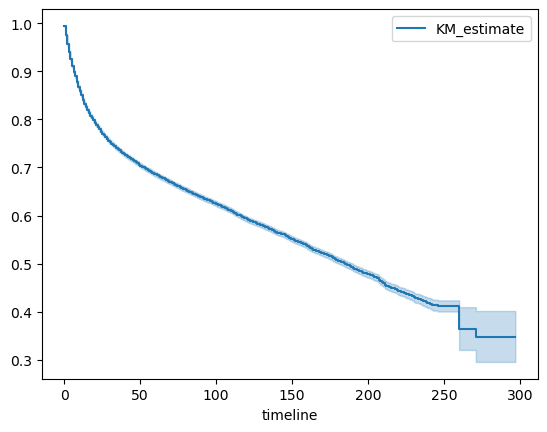

In [24]:
kmf.survival_function_
kmf.cumulative_density_
kmf.plot_survival_function(ci_show=True)

<AxesSubplot:xlabel='timeline'>

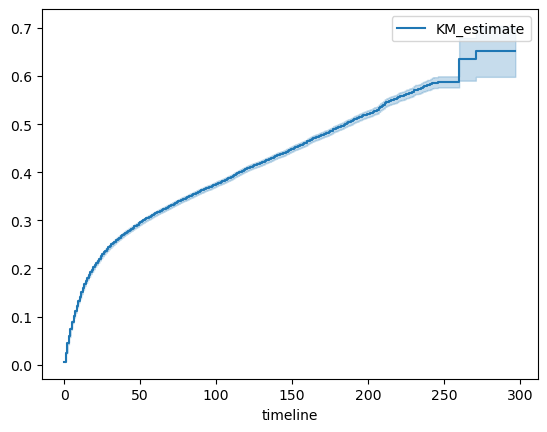

In [25]:
kmf.plot_cumulative_density(ci_show=True)

## 전이 유무로 구분해서 KMF fitting

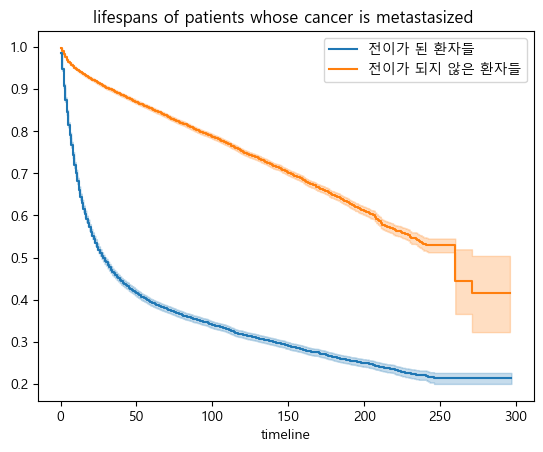

In [28]:
# 한글 폰트 설정
from matplotlib import rc
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False


ax = plt.subplot(111)

seer_tf = (df['seer_TF'] == 1)

kmf.fit(T[seer_tf], event_observed =E[seer_tf], label ='전이가 된 환자들')
kmf.plot_survival_function(ax=ax)

kmf.fit(T[~seer_tf], event_observed = E[~seer_tf], label = '전이가 되지 않은 환자들')
kmf.plot_survival_function(ax=ax)

plt.title('lifespans of patients whose cancer is metastasized ');

* 전이가 된 환자들의 생존율이 더 낮음

In [10]:
# import matplotlib
# import lifelines


# print(lifelines.__version__)
# print(matplotlib.__version__)

# 위의 matplotlib 그래프 실행과정에서 의존성문제 때문에 anaconda 가상환경을 다시 세팅하였음.

In [29]:
df.head()

,SERIAL_ID,sex,age,icd_10,seercode,event_inc,stime,tx_1,tx_2,tx_3,tx_4,tx_5,seer_TF
0,142,1,59,C163,3.0,1,0,0,0,0,0,0,1
1,142,1,59,C163,3.0,1,0,0,0,0,0,0,1
2,328,2,72,C160,2.0,1,0,0,0,0,0,0,1
3,365,1,41,C161,3.0,1,160,1,0,1,0,0,1
4,478,1,59,C163,1.0,1,168,1,0,0,0,0,0


In [30]:
print(df['tx_1'].value_counts()/len(df)*100)
print(df['tx_2'].value_counts()/len(df)*100)
print(df['tx_3'].value_counts()/len(df)*100)
print(df['tx_4'].value_counts()/len(df)*100)
print(df['tx_5'].value_counts()/len(df)*100)

tx_1
1    78.284724
0    21.715276
Name: count, dtype: float64
tx_2
0    77.01415
1    22.98585
Name: count, dtype: float64
tx_3
0    99.035037
1     0.964963
Name: count, dtype: float64
tx_4
0    99.82674
1     0.17326
Name: count, dtype: float64
tx_5
0    99.901338
1     0.098662
Name: count, dtype: float64


# 수술 여부에 따른 생존율 비교

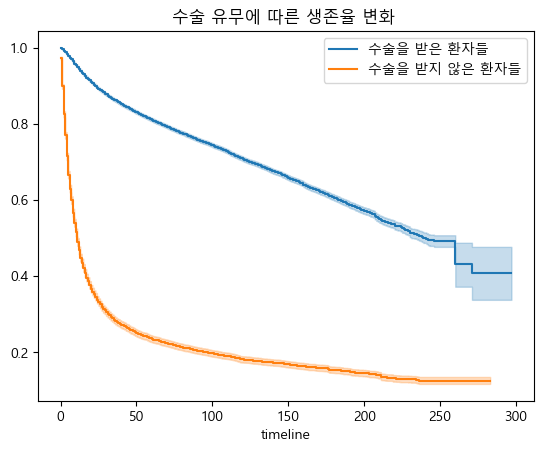

In [32]:
# 한글 폰트 설정
from matplotlib import rc
plt.rc('font', family='Malgun Gothic')

ax = plt.subplot(111)

tx1 = (df['tx_1'] == 1)

kmf.fit(T[tx1], event_observed =E[tx1], label ='수술을 받은 환자들')
kmf.plot_survival_function(ax=ax)

kmf.fit(T[~tx1], event_observed = E[~tx1], label = '수술을 받지 않은 환자들')
kmf.plot_survival_function(ax=ax)

plt.title('수술 유무에 따른 생존율 변화 ');

## 화학치료 유무에 따른 생존율 비교

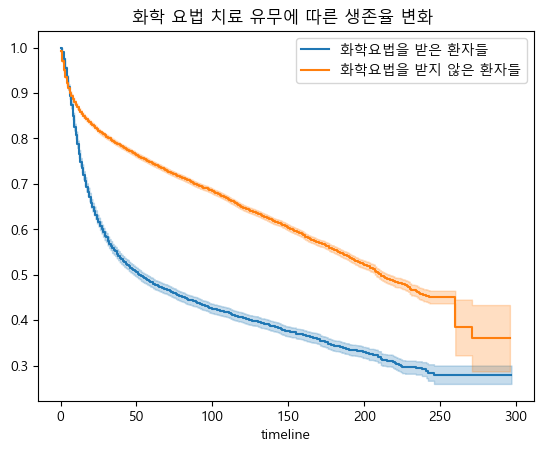

In [33]:
ax = plt.subplot(111)

tx2 = (df['tx_2'] == 1)

kmf.fit(T[tx2], event_observed =E[tx2], label ='화학요법을 받은 환자들')
kmf.plot_survival_function(ax=ax)

kmf.fit(T[~tx2], event_observed = E[~tx2], label = '화학요법을 받지 않은 환자들')
kmf.plot_survival_function(ax=ax)

plt.title('화학 요법 치료 유무에 따른 생존율 변화 ');

## 방사선 치료 유무에 따른 생존율 변화

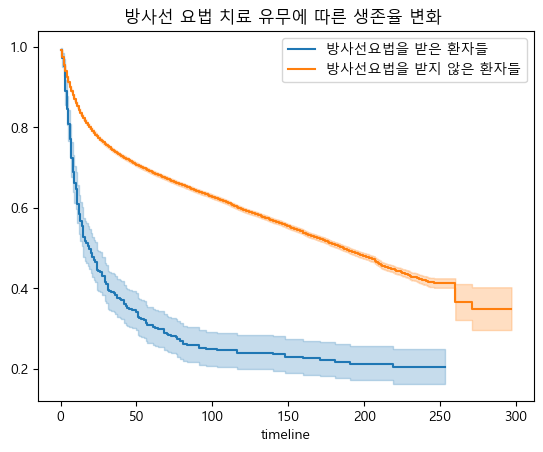

In [34]:
ax = plt.subplot(111)

tx3 = (df['tx_3'] == 1)

kmf.fit(T[tx3], event_observed =E[tx3], label ='방사선요법을 받은 환자들')
kmf.plot_survival_function(ax=ax)

kmf.fit(T[~tx3], event_observed = E[~tx3], label = '방사선요법을 받지 않은 환자들')
kmf.plot_survival_function(ax=ax)

plt.title('방사선 요법 치료 유무에 따른 생존율 변화 ');

## 면역요법  치료에 따른 생존율 변화

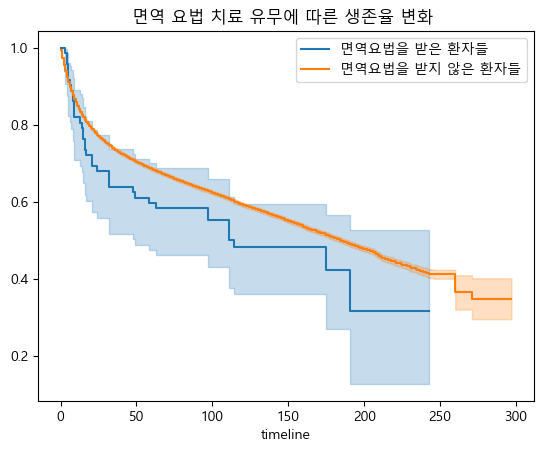

In [35]:
ax = plt.subplot(111)

tx4 = (df['tx_4'] == 1)

kmf.fit(T[tx4], event_observed =E[tx4], label ='면역요법을 받은 환자들')
kmf.plot_survival_function(ax=ax)

kmf.fit(T[~tx4], event_observed = E[~tx4], label = '면역요법을 받지 않은 환자들')
kmf.plot_survival_function(ax=ax)

plt.title('면역 요법 치료 유무에 따른 생존율 변화 ');

## 호르몬 요법 치료에 따른 생존율 변화

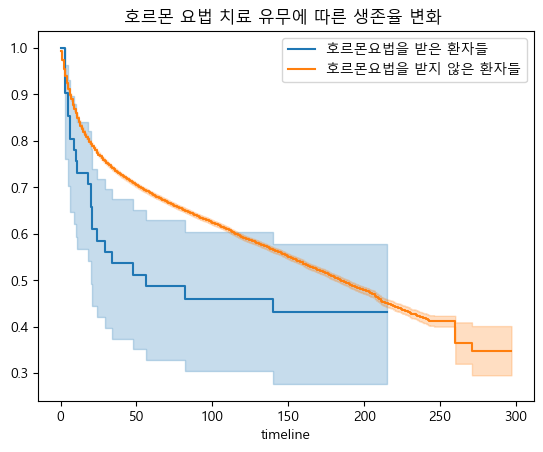

In [36]:
ax = plt.subplot(111)

tx5 = (df['tx_5'] == 1)

kmf.fit(T[tx5], event_observed =E[tx5], label ='호르몬요법을 받은 환자들')
kmf.plot_survival_function(ax=ax)

kmf.fit(T[~tx5], event_observed = E[~tx5], label = '호르몬요법을 받지 않은 환자들')
kmf.plot_survival_function(ax=ax)

plt.title('호르몬 요법 치료 유무에 따른 생존율 변화 ');

* kmf.fit()을 호출하면 기존 데이터는 초기화되고, 새 데이터를 기준으로 결과를 덮어씌웁니다. 따라서 한 kmf 객체를 여러번 사용하는 것은 안전하지만, 결과를 독립적으로 유지하고 싶다면 객체를 분리하는 편이 좋다고 함.

## 한계점


**Kaplan-meier 와 nelson Aalen 방법은 단일 요인의 영향을 평가하기 위한 도구임.**


**위의 분석은 치료 방법 각각에 대한 비교를 하고 있음. 그러나 두 가지 치료를 받은 환자들도 본 데이터에 포함이 되어있는데, 다른 치료의 영향이 무시되고 있음.**


* cox-ph 모형을 사용하여서 다중 요인을 분석하거나, 특정 그룹을 분리하여 비교하는 방법을 사용.

## Duration 을 정규화

In [17]:
kmf.fit(T,E, timeline=range(0,100,2))
kmf.survival_function_
kmf.confidence_interval_

median_ = kmf.median_survival_time_
median_confidence_interval_ = median_survival_times(kmf.confidence_interval_)

In [20]:
df.head()

,sex,age,icd_10,seercode,event,stime,mcode2,tx_1,tx_2,tx_3,tx_4,tx_5
0,1,78,C169,NaN,1,9,3,0,0,0,0,0
1,2,56,C166,NaN,1,16,3,0,1,1,0,0
2,1,50,C169,NaN,0,300,3,0,0,0,0,0
3,1,50,C169,NaN,0,300,3,0,0,0,0,0
4,1,50,C169,NaN,0,300,3,0,0,0,0,0


## timeline 세팅

In [ ]:

ax = plt.subplot(111)

seer_tf = (df['seer_TF'] == 1)

kmf.fit(T[seer_tf], event_observed =E[seer_tf], label ='전이가 된 환자들')
kmf.plot_survival_function(ax=ax)

kmf.fit(T[~seer_tf], event_observed = E[~seer_tf], label = '전이가 되지 않은 환자들')
kmf.plot_survival_function(ax=ax)

plt.title('lifespans of patients whose cancer is metastasized ');

## "기간" 과 "Event indicator" 를 생성해주는 메서드 제공
* 본 데이터는 이미 기간(월 단위) 로 전처리를 완료했기 때문에 아래 과정을 거치지는 않을 것임.

In [37]:
# from lifelines.utils import datetimes_to_durations

# start_date = ['2013-10-10 0:00:00', '2013-10-09', '2013-10-10']
# end_date = ['2013-10-13', '2013-10-10', None]
# T, E = datetimes_to_durations(start_date, end_date, fill_date='2013-10-15')
# print('T (durations): ', T)
# print('E (event_observed): ', E)

## Nelson-Aalen Fitter

In [39]:
T = df["stime"]
E = df["event_inc"]

from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter()

naf.fit(T,event_observed=E)

<lifelines.NelsonAalenFitter:"NA_estimate", fitted with 41556 total observations, 24417 right-censored observations>

          NA_estimate
timeline             
0.0          0.006446
1.0          0.025616
2.0          0.045237
3.0          0.061533
4.0          0.078150


<AxesSubplot:xlabel='timeline'>

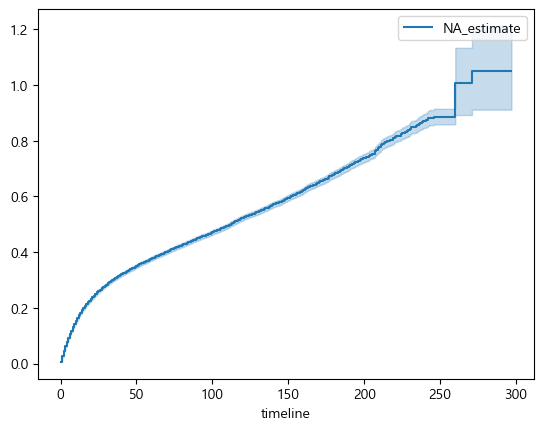

In [40]:
print(naf.cumulative_hazard_.head())
naf.plot_cumulative_hazard()

## 면역요법에 따른 누적위험함수.

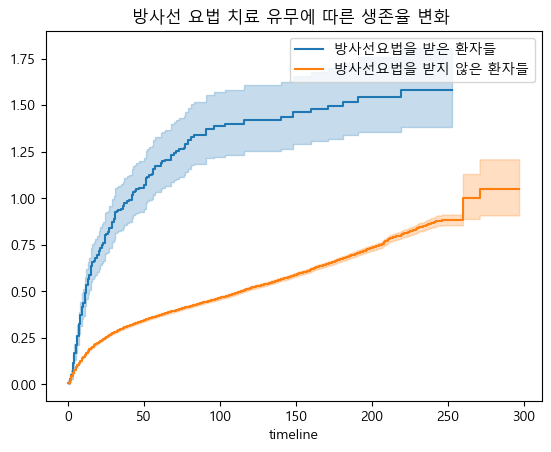

In [41]:
ax = plt.subplot(111)

tx3 = (df['tx_3'] == 1)

naf.fit(T[tx3], event_observed =E[tx3], label ='방사선요법을 받은 환자들')
naf.plot_cumulative_hazard(ax=ax)

naf.fit(T[~tx3], event_observed = E[~tx3], label = '방사선요법을 받지 않은 환자들')
naf.plot_cumulative_hazard(ax=ax)

plt.title('방사선 요법 치료 유무에 따른 생존율 변화 ');

## hazard function plot 하기

(0.0, 300.0)

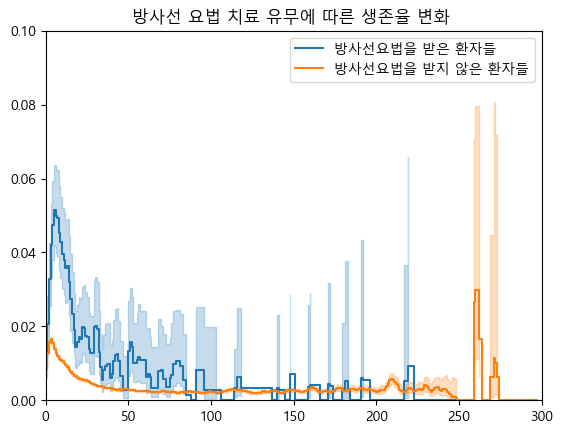

In [45]:
bandwidth = 3

tx3 = (df['tx_3'] == 1)

naf.fit(T[tx3], event_observed =E[tx3], label ='방사선요법을 받은 환자들')
ax = naf.plot_hazard(bandwidth = bandwidth)

naf.fit(T[~tx3], event_observed = E[~tx3], label = '방사선요법을 받지 않은 환자들')
naf.plot_hazard(ax=ax, bandwidth = bandwidth)

plt.title('방사선 요법 치료 유무에 따른 생존율 변화 ')
plt.ylim(0,0.1)
plt.xlim(0,300)

* 본 그래프의 문제는 교란변수를 통제하지 못하였다는 점임. 
* 위에서 추출한 방사선 요법 ==1 인 환자들은 방사선 요법을 받았지만, 다른 치료도 받았을 수도 있다. 
* 방사선 요법==0 인 환자들은 방사선요법 치료는 안받았지만, 수술,화학요법 치료는 받았을 수도 있다.
**결론**
* 왜 방사선 요법을 받은 사람들의 사망률이 더 높은가 했는데, 방사선 요법을 안받은사람들 중 수술요법을 받은 사람들이 많을 수도 있기 때문이다. 그러면 [수술>방사선] (생존율) 이기 때문에 이러한 결과가 나왔을 수 잇다.

## cox-ph fitter 를 이용해 중요 요인 선별

In [46]:
df.head()

,SERIAL_ID,sex,age,icd_10,seercode,event_inc,stime,tx_1,tx_2,tx_3,tx_4,tx_5,seer_TF
0,142,1,59,C163,3.0,1,0,0,0,0,0,0,1
1,142,1,59,C163,3.0,1,0,0,0,0,0,0,1
2,328,2,72,C160,2.0,1,0,0,0,0,0,0,1
3,365,1,41,C161,3.0,1,160,1,0,1,0,0,1
4,478,1,59,C163,1.0,1,168,1,0,0,0,0,0


In [48]:
from lifelines import CoxPHFitter

data =df[['stime','event_inc','tx_1','tx_3','tx_4','tx_5','seer_TF','age','sex']]
cph=CoxPHFitter()
cph.fit(data, duration_col='stime', event_col='event_inc')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 41556 total observations, 24417 right-censored observations>
             duration col = 'stime'
                event col = 'event_inc'
      baseline estimation = breslow
   number of observations = 41556
number of events observed = 17139
   partial log-likelihood = -163734.30
         time fit was run = 2024-11-29 12:20:30 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
tx_1      -1.51      0.22      0.02           -1.54           -1.47                0.21                0.23
tx_3       0.24      1.27      0.06            0.13            0.35                1.13                1.42
tx_4       0.15      1.16      0.16           -0.17            0.46                0.84                1.59
tx_5       0.14      1.15      0.21           -0.27            0.55                0.76                1.73
seer_TF    1.39      4.00      0.02            1.36            1.42                3.88                4.13
age        0.04      1.04      0.00            0.04            0.04                1.04                1.04
sex       -0.20      0.82      0.02           -0.24           -0.17                0.79                0.84

           cmp to      z      p  -log2(p)
covariate                                
tx_1         0.00 -92.52 <0.005       inf
tx_3         0.00   4.13 <0.005     14.73
tx_4         0.00   0.89   0.37      1.43
tx_5         0.00   0.67   0.50      0.99
seer_TF      0.00  86.57 <0.005       inf
age          0.00  57.39 <0.005       inf
sex          0.00 -12.11 <0.005    109.73
---
Concordance = 0.82
Partial AIC = 327482.60
log-likelihood ratio test = 21300.11 on 7 df
-log2(p) of ll-ratio test = inf